### TEL354 - Minería de datos
# Taller 4

Nombre: Tomas Campusano

**Objetivo:** Analizar las palabras más frecuentes de los últimos *tweets* y *retweets* de alguna cuenta en español y clasificarlos de acuerdo a su polaridad usando NLP.

In [1]:
import pandas as pd

1. Elegir un archivo disponible de *tweets*, cargar los datos en un DataFrame y mostrarlo. (Kast)

In [2]:
df = pd.read_csv('Kast.csv')
df

,type,text
0,Retweet,Hoy acordamos proponer a @NinoskaEsther2 como ...
1,Retweet,TVN registró pérdidas de $1.526 millones el pr...
2,Retweet,En Chile buscan las #CuotasEncubiertas en el m...
3,Retweet,Tras 6 años ¿por qué #Chile vuelve a tener rel...
4,Tweet,Felicitaciones a @vox_es y a su lider @Santi_A...
...,...,...
1090,Tweet,"En Huasco, Freirina y Vallenar también tuvimos..."
1091,Tweet,En esta #Gira345 por la región de Atacama pued...
1092,Tweet,#Gira345 En esta gira por la región de Atacama...
1093,Retweet,¿El Presidente podría renunciar? Mi columna ho...


2. Instalar la librería `pysentimiento`.

In [3]:
pip install pysentimiento

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


3. Para cada tweet predecir la polaridad `POS`, `NEU`, `NEG` usando la función `create_analyzer` y agregar este valor al DataFrame en una nueva columna.

In [4]:
from pysentimiento import create_analyzer

analizador = create_analyzer(task="sentiment", lang="es")

polaridades_raw=[]

for tweet in df["text"]:
    polaridades= analizador.predict(tweet)
    polaridades_raw.append(polaridades)

polaridad = []
for i in polaridades_raw:
    polaridad.append(i.output)

df["polaridad"]=polaridad
df

,type,text,polaridad
0,Retweet,Hoy acordamos proponer a @NinoskaEsther2 como ...,POS
1,Retweet,TVN registró pérdidas de $1.526 millones el pr...,NEU
2,Retweet,En Chile buscan las #CuotasEncubiertas en el m...,NEU
3,Retweet,Tras 6 años ¿por qué #Chile vuelve a tener rel...,NEG
4,Tweet,Felicitaciones a @vox_es y a su lider @Santi_A...,POS
...,...,...,...
1090,Tweet,"En Huasco, Freirina y Vallenar también tuvimos...",NEU
1091,Tweet,En esta #Gira345 por la región de Atacama pued...,NEU
1092,Tweet,#Gira345 En esta gira por la región de Atacama...,POS
1093,Retweet,¿El Presidente podría renunciar? Mi columna ho...,NEG


4. Transforme a minúsculas, elimine puntuación, símbolos, emojis y filtre palabras "stopwords" del idioma español en todos los tweets. 

Ayuda: Puede usar expresiones regulares como `[^\w\s]` para eliminar puntuación y la siguiente lista de stopwords: `nltk.corpus.stopwords.words`. 

De forma adicional, si desea agregar otra palabra a la lista de stopwords, realizar alguna otra normalización o limpieza sobre los datos, está permitido.

In [5]:
import nltk
from nltk.corpus import stopwords

In [6]:
import re

In [7]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tomas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
tweet_limpios=[]
for tweet in df['text']:
    tweet = tweet.lower()
    tweet = re.sub(r'[^\w\s]', '', tweet)
    #tweet = tweet.encode('ascii', 'ignore').decode('ascii')

    palabras = tweet.split()
    palabras_filtradas = [palabra for palabra in palabras if palabra not in stopwords.words("spanish")]
    tweet_limpio = " ".join(palabras_filtradas)
    tweet_limpios.append(tweet_limpio)

df["text"]=tweet_limpios

df


,type,text,polaridad
0,Retweet,hoy acordamos proponer ninoskaesther2 candidat...,POS
1,Retweet,tvn registró pérdidas 1526 millones primer tri...,NEU
2,Retweet,chile buscan cuotasencubiertas mundo ciencia i...,NEU
3,Retweet,tras 6 años chile vuelve tener relaciones dipl...,NEG
4,Tweet,felicitaciones vox_es lider santi_abascal gran...,POS
...,...,...,...
1090,Tweet,huasco freirina vallenar posibilidad conocer i...,NEU
1091,Tweet,gira345 región atacama puede conocer inquietud...,NEU
1092,Tweet,gira345 gira región atacama pude conocer plant...,POS
1093,Retweet,presidente podría renunciar columna hoy laterc...,NEG


5. Instalar la librería `Wordcloud`.

In [9]:
pip install wordcloud


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


6. Generar una nube de palabras para los mensajes con polaridad positiva `POS` y otra para los mensajes con polaridad negativa `NEG`. Asigne un `colormap` de color diferente para cada polaridad (Por ejemplo, rojo y azul). Muestre ambos gráficos en una misma fila, uno al lado del otro usando `subplots`.

In [10]:
from wordcloud import WordCloud

In [11]:
import matplotlib.pyplot as plt

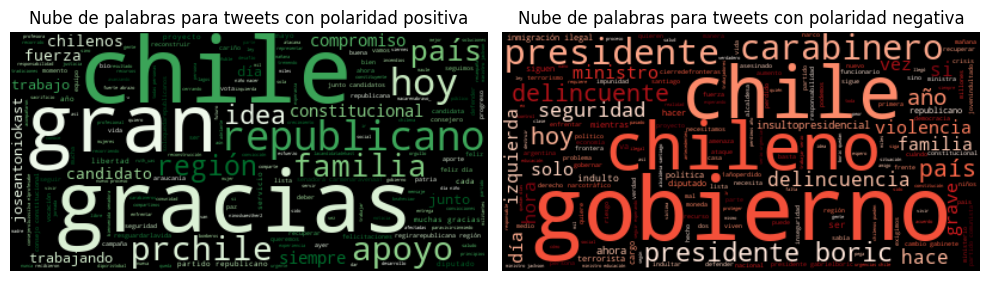

In [14]:
df_pos = df[df["polaridad"]== "POS"]
df_neg = df[df["polaridad"]== "NEG"]


#Nube de palabras con polaridad positiva
tweets_pos = " ".join(df_pos['text'])
nube_pos = WordCloud(colormap="Greens").generate(tweets_pos)


#Nube de palabras con polaridad negativa
tweets_neg = " ".join(df_neg['text'])
nube_neg = WordCloud(colormap="Reds").generate(tweets_neg)

#Grafico General
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(nube_pos, interpolation="bilinear")
axs[0].axis("off")
axs[0].set_title("Nube de palabras para tweets con polaridad positiva")

axs[1].imshow(nube_neg, interpolation="bilinear")
axs[1].axis("off")
axs[1].set_title("Nube de palabras para tweets con polaridad negativa")


plt.tight_layout()
plt.show()

7. Analizar las palabras más representativas de cada nube. ¿Qué palabras usa con mayor frecuencia el usuario para expresar sentimientos negativos y cuáles para sentimientos positivos? ¿Hay palabras que están presentes en ambos sentimientos?

- Kast ocupa las palabras republicano , gracias y familia con mayor frecuencia para expresar sentimientos positivos
- Kast ocupa las palabras chileno , gobierno y presidente con mayor frecuencia para expresar sentimientos negativos
- Las palabras  Chile , familia , hoy se encuentra en ambas nubes